In [ ]:
import numpy as np
import pandas as pd
import sklearn.datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score, precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler

# Load the breast cancer dataset
breast_cancer_dataset = sklearn.datasets.load_breast_cancer()
data = pd.DataFrame(breast_cancer_dataset.data, columns=breast_cancer_dataset.feature_names)
data['target'] = breast_cancer_dataset.target




In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# print last 5 rows of the dataframe
data.tail()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039,1


In [ ]:
# number of rows and columns in the dataset
data.shape

(569, 31)

In [ ]:
# getting some information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [ ]:
# statistical measures about the data
data.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [ ]:
# checking the distribution of Target Varibale
data['target'].value_counts()


target
1    357
0    212
Name: count, dtype: int64

<ipython-input-74-0bd46e5b11a8>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=tumor_counts.index, y=tumor_counts.values, palette='viridis')


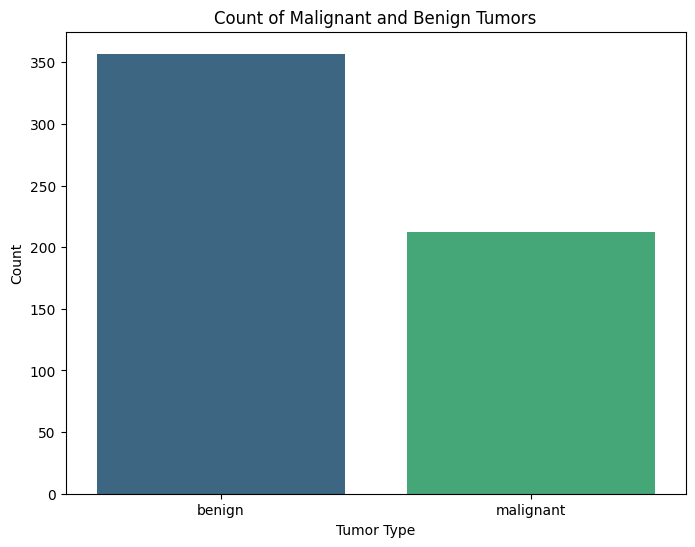

In [ ]:
# Map the target values to categorical labels
target_mapping = {0: 'malignant', 1: 'benign'}
data['target'] = data['target'].map(target_mapping)

# Get the count of each tumor type
tumor_counts = data['target'].value_counts()

# Plot the count graph
plt.figure(figsize=(8, 6))
sns.barplot(x=tumor_counts.index, y=tumor_counts.values, palette='viridis')
plt.title('Count of Malignant and Benign Tumors')
plt.xlabel('Tumor Type')
plt.ylabel('Count')
plt.show()

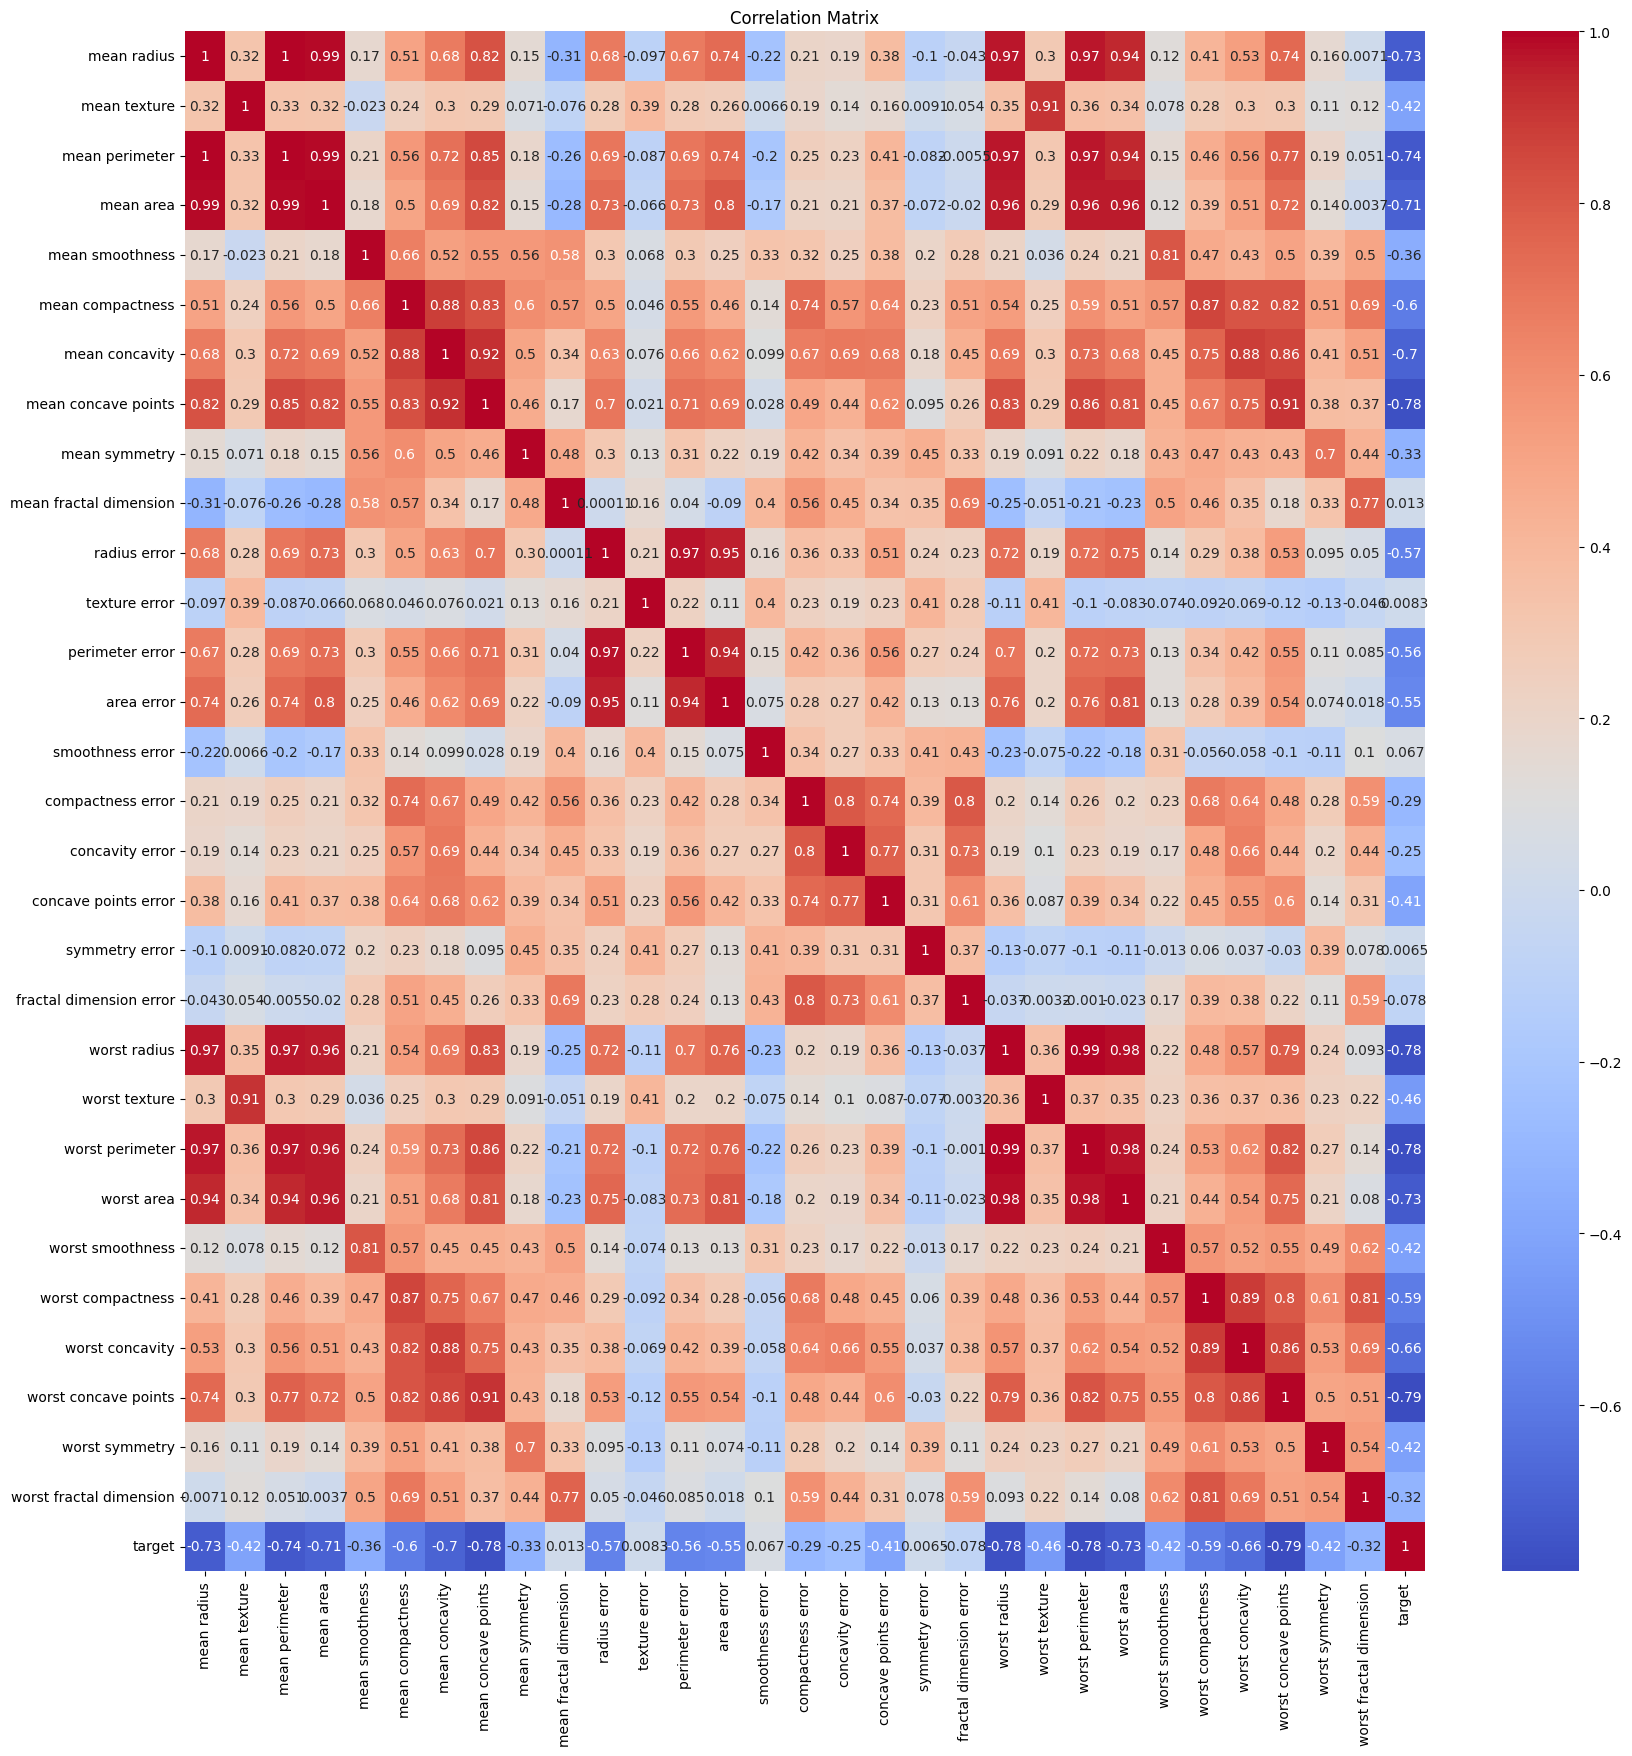

Selected features based on correlation threshold:
Index(['mean radius', 'mean perimeter', 'mean area', 'mean compactness',
       'mean concavity', 'mean concave points', 'radius error',
       'perimeter error', 'area error', 'worst radius', 'worst perimeter',
       'worst area', 'worst compactness', 'worst concavity',
       'worst concave points', 'target'],
      dtype='object')

Dropped features due to low correlation:
Index(['mean texture', 'mean smoothness', 'mean symmetry',
       'mean fractal dimension', 'texture error', 'smoothness error',
       'compactness error', 'concavity error', 'concave points error',
       'symmetry error', 'fractal dimension error', 'worst texture',
       'worst smoothness', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')


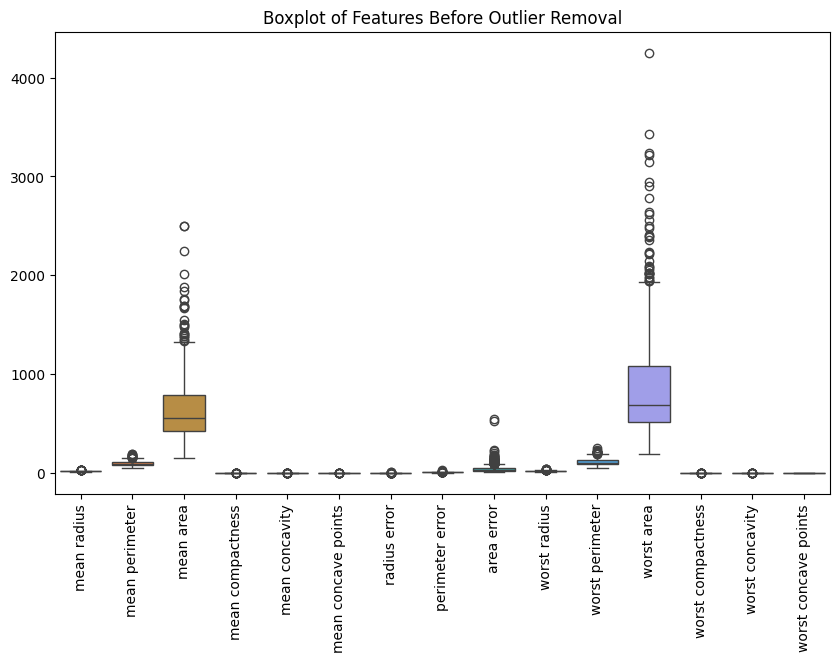

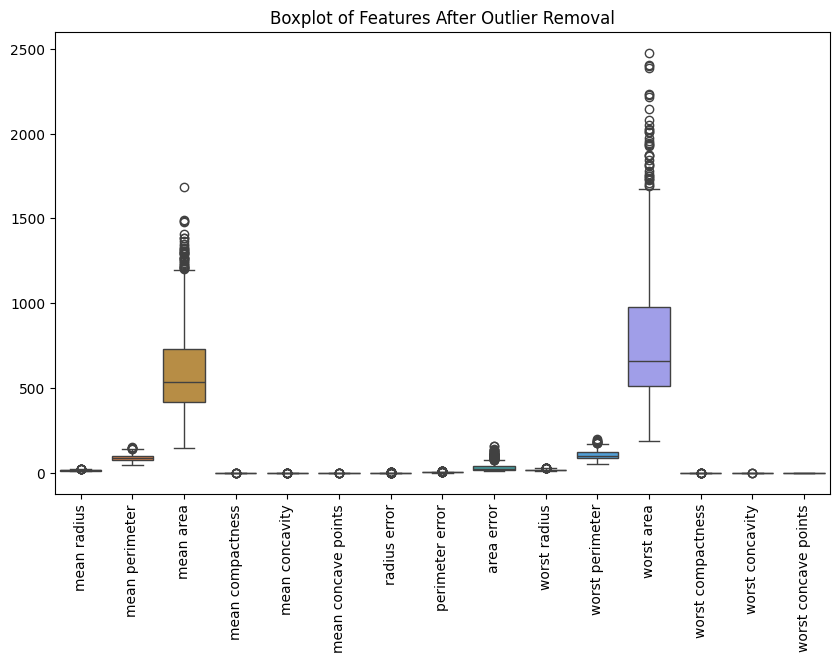

Outliers Removed:
Empty DataFrame
Columns: [mean radius, mean perimeter, mean area, mean compactness, mean concavity, mean concave points, radius error, perimeter error, area error, worst radius, worst perimeter, worst area, worst compactness, worst concavity, worst concave points, target]
Index: []


In [ ]:

# Data Cleaning
# Handle missing values (if any)
data = data.dropna()
# Convert target column back to numeric for correlation calculation
data['target'] = data['target'].map({'malignant': 0, 'benign': 1})

# Exploratory Data Analysis (EDA)
# Correlation analysis
correlation_matrix = data.corr()

# Correlation matrix visualization
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Remove less correlated features
# We select features with correlation coefficient greater than a threshold (absolute value) with the target
correlation_threshold = 0.5
correlated_features = correlation_matrix.index[abs(correlation_matrix["target"]) > correlation_threshold]

# Display the features that are there
print("Selected features based on correlation threshold:")
print(correlated_features)



# You can also print the features that are dropped due to low correlation
dropped_features = correlation_matrix.index[abs(correlation_matrix["target"]) <= correlation_threshold]
print("\nDropped features due to low correlation:")
print(dropped_features)


# Keep only the correlated features
data = data[correlated_features]


# Outlier detection and visualization before removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['target']))
plt.title('Boxplot of Features Before Outlier Removal')
plt.xticks(rotation=90)
plt.show()

# Outlier detection and removal using Z-score
z_scores = np.abs(stats.zscore(data.drop(columns=['target'])))
outliers_removed = data[(z_scores < 3).all(axis=1)]
data = data[(z_scores < 3).all(axis=1)]

# Outlier detection and visualization after removal
plt.figure(figsize=(10, 6))
sns.boxplot(data=data.drop(columns=['target']))
plt.title('Boxplot of Features After Outlier Removal')
plt.xticks(rotation=90)
plt.show()


removed_indices = data.index.difference(outliers_removed.index)
removed_outliers = data.loc[removed_indices]

print("Outliers Removed:")
print(removed_outliers)

# Data Transformation
# Normalize/Standardize the data
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data.drop(columns=['target']))
data_scaled = pd.DataFrame(scaled_features, columns=data.columns[:-1])
data_scaled['target'] = data['target'].values

# Data Splitting
X = data_scaled.drop(columns=['target'])
Y = data_scaled['target']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [ ]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=6)

# Train the model
knn.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = knn.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = knn.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy on test data = {test_data_accuracy * 100:.2f}%')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
class_report = classification_report(Y_test, X_test_prediction)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)




# Example input data for prediction
input_data = {
    'mean radius': 13.54, 'mean perimeter': 87.46, 'mean area': 566.3,
    'mean compactness': 0.08129, 'mean concavity': 0.06664,
    'mean concave points': 0.04781,
    'radius error': 0.2699,'perimeter error': 2.058, 'area error': 23.56,
    'worst radius': 15.11,'worst perimeter': 99.7, 'worst area': 711.2,
    'worst compactness': 0.1773, 'worst concavity': 0.239,
    'worst concave points': 0.1288,
}

# Select the relevant features used in training
input_data_filtered = {key: value for key, value in input_data.items() if key in correlated_features}

# Change the input data to a DataFrame and standardize it
input_data_df = pd.DataFrame([input_data_filtered])
input_data_scaled = scaler.transform(input_data_df)

# Make a prediction
prediction = knn.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Breast Cancer is Malignant')
else:
    print('The Breast Cancer is Benign')


Accuracy on training data =  0.9561855670103093
Accuracy on test data = 92.78%
Confusion Matrix:
[[23  2]
 [ 5 67]]

Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.92      0.87        25
           1       0.97      0.93      0.95        72

    accuracy                           0.93        97
   macro avg       0.90      0.93      0.91        97
weighted avg       0.93      0.93      0.93        97

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:
#logistical regression model
#Model Training
# training the Logistic Regression model using Training data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, Y_train)



# Accuracy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy on test data = {test_data_accuracy * 100:.2f}%')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
class_report = classification_report(Y_test, X_test_prediction)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



# Example input data for prediction
input_data = {
    'mean radius': 13.54, 'mean perimeter': 87.46, 'mean area': 566.3,
    'mean compactness': 0.08129, 'mean concavity': 0.06664,
    'mean concave points': 0.04781,
    'radius error': 0.2699,'perimeter error': 2.058, 'area error': 23.56,
    'worst radius': 15.11,'worst perimeter': 99.7, 'worst area': 711.2,
    'worst compactness': 0.1773, 'worst concavity': 0.239,
    'worst concave points': 0.1288,
}

# Select the relevant features used in training
input_data_filtered = {key: value for key, value in input_data.items() if key in correlated_features}

# Change the input data to a DataFrame and standardize it
input_data_df = pd.DataFrame([input_data_filtered])
input_data_scaled = scaler.transform(input_data_df)

# Make a prediction
prediction = model.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Breast Cancer is Malignant')
else:
    print('The Breast Cancer is Benign')



Accuracy on training data =  0.9561855670103093
Accuracy on test data = 96.91%
Confusion Matrix:
[[23  2]
 [ 1 71]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        25
           1       0.97      0.99      0.98        72

    accuracy                           0.97        97
   macro avg       0.97      0.95      0.96        97
weighted avg       0.97      0.97      0.97        97

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Accuracy on training data =  1.0
Accuracy on test data = 94.85%
Confusion Matrix:
[[23  2]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.92      0.90        25
           1       0.97      0.96      0.97        72

    accuracy                           0.95        97
   macro avg       0.93      0.94      0.93        97
weighted avg       0.95      0.95      0.95        97

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


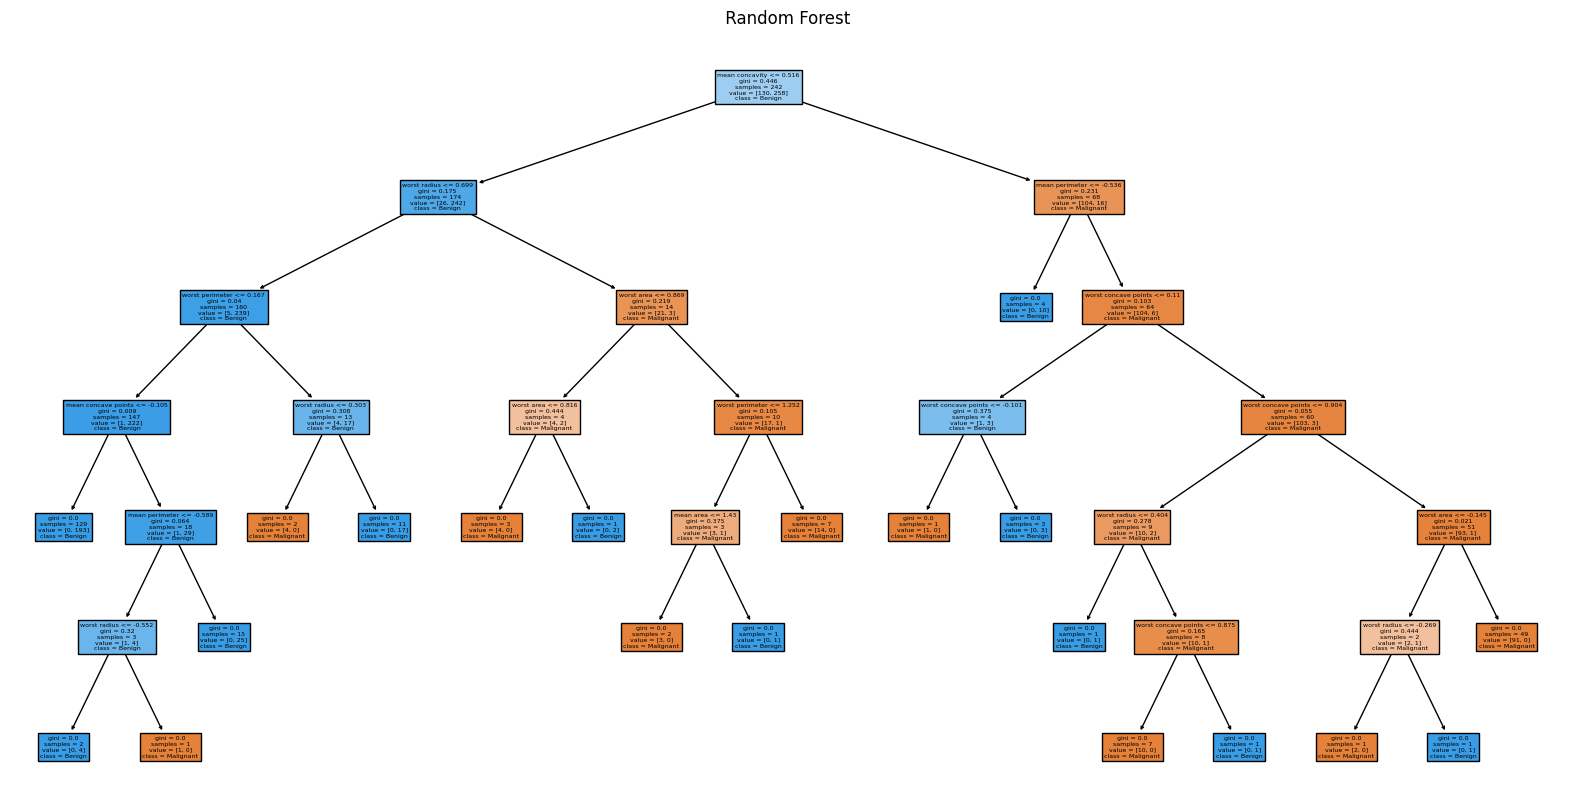

In [ ]:
#RANDOM FOREST MODEL
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import graphviz
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, Y_train)


# Accuracy on training data
X_train_prediction = rf_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = rf_classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy on test data = {test_data_accuracy * 100:.2f}%')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
class_report = classification_report(Y_test, X_test_prediction)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)



# Example input data for prediction
input_data = {
    'mean radius': 13.54, 'mean perimeter': 87.46, 'mean area': 566.3,
    'mean compactness': 0.08129, 'mean concavity': 0.06664,
    'mean concave points': 0.04781,
    'radius error': 0.2699,'perimeter error': 2.058, 'area error': 23.56,
    'worst radius': 15.11,'worst perimeter': 99.7, 'worst area': 711.2,
    'worst compactness': 0.1773, 'worst concavity': 0.239,
    'worst concave points': 0.1288,
}

# Select the relevant features used in training
input_data_filtered = {key: value for key, value in input_data.items() if key in correlated_features}

# Change the input data to a DataFrame and standardize it
input_data_df = pd.DataFrame([input_data_filtered])
input_data_scaled = scaler.transform(input_data_df)

# Make a prediction
prediction = rf_classifier.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Breast Cancer is Malignant')
else:
    print('The Breast Cancer is Benign')


# Visualization of  the Random Forest
plt.figure(figsize=(20, 10))
plot_tree(rf_classifier.estimators_[0], filled=True, feature_names=correlated_features[:-1], class_names=['Malignant', 'Benign'])
plt.title(' Random Forest')
plt.show()





Accuracy on training data =  1.0
Accuracy on test data = 92.78%
Confusion Matrix:
[[21  4]
 [ 3 69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.95      0.96      0.95        72

    accuracy                           0.93        97
   macro avg       0.91      0.90      0.90        97
weighted avg       0.93      0.93      0.93        97

[1]
The Breast Cancer is Benign


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


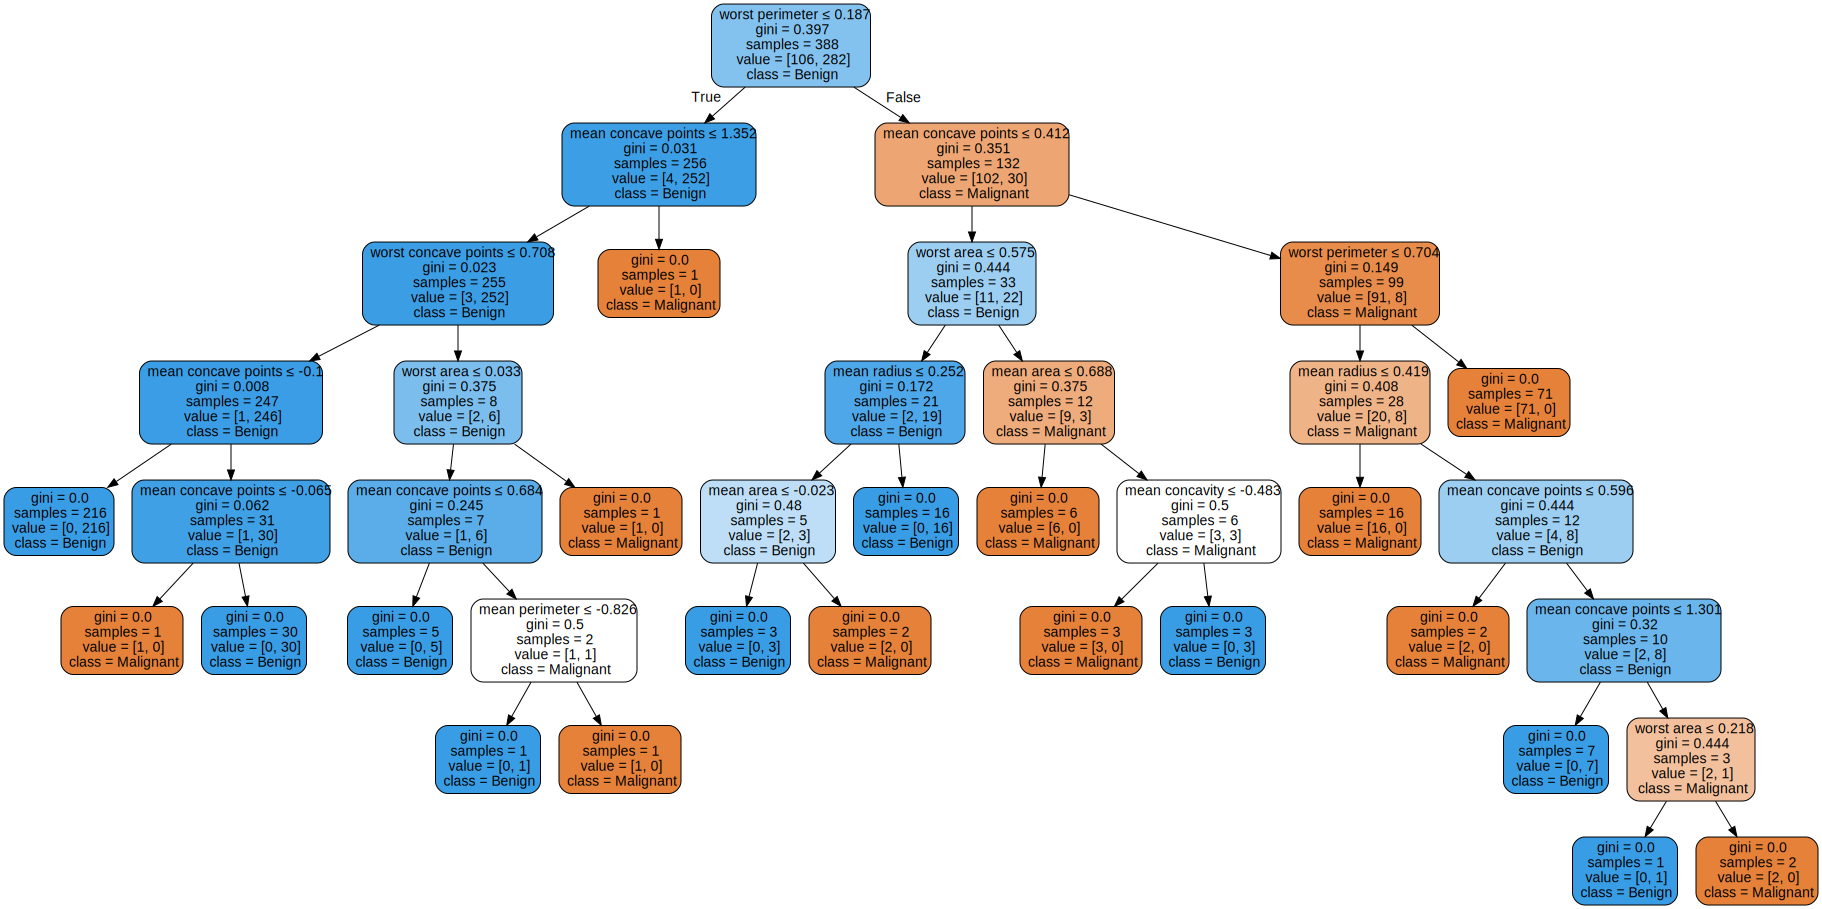

In [ ]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import graphviz
import matplotlib.pyplot as plt
import pandas as pd
import pydotplus
from sklearn import tree
import pydotplus
# Assuming you have already trained and tested your DecisionTreeClassifier
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, Y_train)

# Accuracy on training data
X_train_prediction = dt_classifier.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy on training data = ', training_data_accuracy)

# Accuracy on test data
X_test_prediction = dt_classifier.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print(f'Accuracy on test data = {test_data_accuracy * 100:.2f}%')

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(Y_test, X_test_prediction)
class_report = classification_report(Y_test, X_test_prediction)

print('Confusion Matrix:')
print(conf_matrix)
print('\nClassification Report:')
print(class_report)


# Example input data for prediction
input_data = {
    'mean radius': 13.54, 'mean perimeter': 87.46, 'mean area': 566.3,
    'mean compactness': 0.08129, 'mean concavity': 0.06664,
    'mean concave points': 0.04781,
    'radius error': 0.2699,'perimeter error': 2.058, 'area error': 23.56,
    'worst radius': 15.11,'worst perimeter': 99.7, 'worst area': 711.2,
    'worst compactness': 0.1773, 'worst concavity': 0.239,
    'worst concave points': 0.1288,
}

# Select the relevant features used in training
input_data_filtered = {key: value for key, value in input_data.items() if key in correlated_features}

# Change the input data to a DataFrame and standardize it
input_data_df = pd.DataFrame([input_data_filtered])
input_data_scaled = scaler.transform(input_data_df)

# Make a prediction with the decision tree classifier
prediction = dt_classifier.predict(input_data_scaled)
print(prediction)

if prediction[0] == 0:
    print('The Breast Cancer is Malignant')
else:
    print('The Breast Cancer is Benign')



# Visualize the decision tree
dot_data = tree.export_graphviz(dt_classifier, out_file=None,
                                feature_names=correlated_features[:-1],
                                class_names=['Malignant', 'Benign'],
                                filled=True, rounded=True,
                                special_characters=True)

graph = pydotplus.graph_from_dot_data(dot_data)

graph.write_png('decision_tree.png')

# Display the decision tree
# The image file 'decision_tree.png' will be saved in the current directory
graphviz.Source(dot_data)

